# Extract Bag of Words (BoW) Features from Course Textual Content

- The main goal of a recommendation system is to help users find items they potentially are interested in. 
- Depending on the task an item can be a movie, restaurant, course etc.
- Machine learnign algorithms can only work with numerical data so I need to extract the features from the text and present them in a numerical format.
- Many items are often described by text so they are associated with textual data, such as the titles and descriptions of a movie or course. 
- Since machine learning algorithms can not process textual data directly, I need to transform the raw text into numeric feature vectors.

# Prepare lab setup

In [1]:
import gensim
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora

%matplotlib inline

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
course_content = pd.read_csv("course_processed.csv")
course_content.head(2)

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...


In [5]:
course_content.iloc[0, :]

COURSE_ID                                               ML0201EN
TITLE          robots are coming  build iot apps with watson ...
DESCRIPTION    have fun with iot and learn along the way  if ...
Name: 0, dtype: object

- merge the title with the description

In [8]:
course_content['course_texts'] = course_content[['TITLE', 'DESCRIPTION']].agg(' '.join, axis=1)
course_content_df = course_content.reset_index()
course_content_df['index'] = course_content_df.index


In [9]:
course_content_df.iloc[0, :]

index                                                           0
COURSE_ID                                                ML0201EN
TITLE           robots are coming  build iot apps with watson ...
DESCRIPTION     have fun with iot and learn along the way  if ...
course_texts    robots are coming  build iot apps with watson ...
Name: 0, dtype: object

In [13]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def tokenize_course(course, keep_only_nouns=True):
    # Use sklearn's built-in English stopwords
    stop_words = set(ENGLISH_STOP_WORDS)
    
    # Use regex to tokenize (matches words only)
    word_tokens = re.findall(r'\b\w+\b', course.lower())
    
    # Remove stopwords and numbers
    word_tokens = [w for w in word_tokens if w not in stop_words and not w.isnumeric()]
    
    # Skip POS tagging since NLTK is not allowed
    if keep_only_nouns:
        # Can't filter nouns accurately without POS tagging
        print("⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).")
    
    return word_tokens


- first course

In [14]:
a_course = course_content_df.iloc[0, :]['course_texts']
a_course

'robots are coming  build iot apps with watson  swift  and node red have fun with iot and learn along the way  if you re a swift developer and want to learn more about iot and watson ai services in the cloud  raspberry pi   and node red  you ve found the right place  you ll build iot apps to read temperature data  take pictures with a raspcam  use ai to recognize the objects in those pictures  and program an irobot create 2 robot  '

In [18]:
# Tokenize
tokens = tokenize_course(a_course)
print("\nTokenized Output:\n", tokens)

⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).

Tokenized Output:
 ['robots', 'coming', 'build', 'iot', 'apps', 'watson', 'swift', 'node', 'red', 'fun', 'iot', 'learn', 'way', 'swift', 'developer', 'want', 'learn', 'iot', 'watson', 'ai', 'services', 'cloud', 'raspberry', 'pi', 'node', 'red', 've', 'right', 'place', 'll', 'build', 'iot', 'apps', 'read', 'temperature', 'data', 'pictures', 'raspcam', 'use', 'ai', 'recognize', 'objects', 'pictures', 'program', 'irobot', 'create', 'robot']


- Generate the bag of words

In [21]:
# Apply tokenization to the whole dataset
course_content_df['tokens'] = course_content_df['course_texts'].apply(tokenize_course)

⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spaCy).
⚠️ Noun filtering is skipped (POS tagging requires NLTK or spa

In [22]:
from gensim import corpora

# Convert tokens into a list
tokenized_courses = course_content_df['tokens'].tolist()

# Create a dictionary from tokenized courses
dictionary = corpora.Dictionary(tokenized_courses)

# Create a BoW corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_courses]

# Preview
print("First course tokens:", tokenized_courses[0])
print("BoW vector for first course:", bow_corpus[0])
print("Dictionary sample (token2id):", list(dictionary.token2id.items())[:10])


First course tokens: ['robots', 'coming', 'build', 'iot', 'apps', 'watson', 'swift', 'node', 'red', 'fun', 'iot', 'learn', 'way', 'swift', 'developer', 'want', 'learn', 'iot', 'watson', 'ai', 'services', 'cloud', 'raspberry', 'pi', 'node', 'red', 've', 'right', 'place', 'll', 'build', 'iot', 'apps', 'read', 'temperature', 'data', 'pictures', 'raspcam', 'use', 'ai', 'recognize', 'objects', 'pictures', 'program', 'irobot', 'create', 'robot']
BoW vector for first course: [(0, 2), (1, 2), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 4), (10, 1), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1)]
Dictionary sample (token2id): [('ai', 0), ('apps', 1), ('build', 2), ('cloud', 3), ('coming', 4), ('create', 5), ('data', 6), ('developer', 7), ('fun', 8), ('iot', 9)]


# Process for all the courses
- Most frequent tokes/words

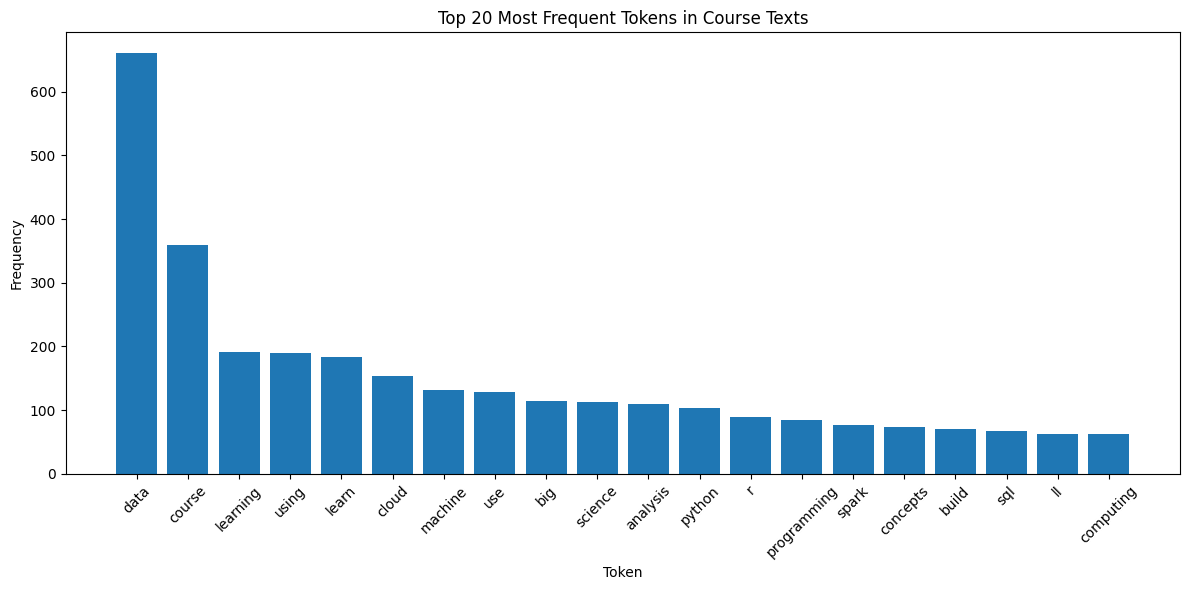

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten all token lists into one big list
all_tokens = [token for tokens in course_content_df['tokens'] for token in tokens]

# Count the most frequent tokens
token_counts = Counter(all_tokens).most_common(20)

# Separate tokens and their counts for plotting
words, counts = zip(*token_counts)

# Plot the top 20 tokens
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Tokens in Course Texts")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
